In [12]:
import numpy as np
import struct
import json 
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path


In [13]:
from __future__ import unicode_literals
import youtube_dl
import os
import shutil
import time

In [28]:
# input : svg file ("Geometric" or "Putative" Adjacency Matrix) for a given model
# output : list of matches
matches = []
svg_file = '/media/sdib/wd_elements/youtube_3Dgroups/media/sdib/wd_elements/group1/list'+ "/" + "GeometricAdjacencyMatrix.svg"
for line in open(svg_file, 'r').read().split('\n'):
    if "<rect" in line:
        x = ( np.float(line.split('"')[1]) / 5 )
        print(x)
        y = ( np.float(line.split('"')[3]) / 5 )
        matches.append(sorted([int(x),int(y)]))

1.0


/tmp/ipykernel_76446/3410769777.py:7: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  x = ( np.float(line.split('"')[1]) / 5 )
/tmp/ipykernel_76446/3410769777.py:9: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y = ( np.float(line.split('"')[3]) / 5 )


In [15]:
print(matches)

[[0, 1]]


In [26]:
len(matches)

1

In [16]:
#Function to recreate an adjacency matrix out of
#the match_list passed as argument."""

# retrieve size of matrix
n = 61

# initialize matrix
adj_mat = np.zeros((61, 61))

idx = np.asarray(matches)

# slice the matrix with correct idxs
adj_mat[idx[:, 0], idx[:, 1]] = 1

#return adj_mat

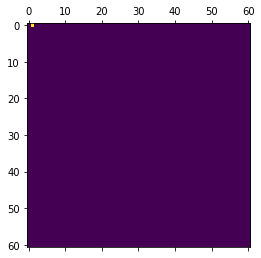

In [17]:
plt.matshow(adj_mat)

In [18]:
# input : list of matches
# output : triangles
#def split_triangles(adj_mat, tol=30):
    #Provides a list containing tuples that describe
    #triangles of images that match : the triangle are composed of the points
    #(i_min, i_min+1), (i_min, i_max), (i_max-1, i_max) in the adjacency matrix.

n = adj_mat.shape[0]
triangles = []
i_min = 0
i_max = 0

for i in range(n):
# Retrieve non zero value for current line
    non_zer = np.nonzero(adj_mat[i])[0]

    # check if at begining or triangle
    if non_zer.size > 0:

        # check if no far image is taken into account
        if abs(non_zer[-1] - non_zer[0]) >= 10:

            length = len(non_zer)
            j = 0

            while j != length-1 and abs(non_zer[j+1] - non_zer[j]) < 10:
                j += 1

        # no far image: take them all
        else:
            i_max = non_zer[-1]

    # empty triangle or at end of triangle
    else:
        if i == i_max:
            # Close triangle
            if i_min < i_max:
                triangles.append((i_min, i_max))
            i_min = i_max = i_max + 1


    #return triangles

In [19]:
triangles

[(0, 1)]

In [20]:
matches = []
svg_file = '/media/sdib/wd_elements/youtube_3Dgroups/media/sdib/wd_elements/group1/list'+ "/" + "GeometricAdjacencyMatrix.svg"
for line in open(svg_file, 'r').read().split('\n'):
    if "<rect" in line:
        x = ( np.float(line.split('"')[1]) / 5 )
        y = ( np.float(line.split('"')[3]) / 5 )
        matches.append(sorted([int(x),int(y)]))



/tmp/ipykernel_76446/3558460117.py:5: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  x = ( np.float(line.split('"')[1]) / 5 )
/tmp/ipykernel_76446/3558460117.py:6: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y = ( np.float(line.split('"')[3]) / 5 )


In [21]:
m = np.zeros((max(max(matches)) + 1, max(max(matches)) + 1))

for pair in matches:
    i = pair[0]
    j = pair[1]
    m[i,j] = 1

In [25]:
m


array([[0., 1.],
       [0., 0.]])